In [1]:
# Dependencies
from census import Census
# from config import  api_key
from config import nomics_key
from config import market_api
import gmaps
import numpy as np
import pandas as pd
import requests
import json
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import urllib.request


In [11]:
url = f"https://api.nomics.com/v1/currencies/ticker?key={nomics_key}&interval=30d,365d&convert=&per-page=100&page=1"

response = requests.get(url).json()

print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "30d": {
            "market_cap_change": "-69978019325.05",
            "market_cap_change_pct": "-0.0577",
            "price_change": "-3804.73712766",
            "price_change_pct": "-0.0592",
            "volume": "1385821053752.34",
            "volume_change": "-178548464556.97",
            "volume_change_pct": "-0.1141"
        },
        "365d": {
            "market_cap_change": "800585366321.91",
            "market_cap_change_pct": "2.3440",
            "price_change": "42090.44616425",
            "price_change_pct": "2.2855",
            "volume": "22088397571718.70",
            "volume_change": "11225286349777.39",
            "volume_change_pct": "1.0333"
        },
        "circulating_supply": "18876287",
        "currency": "BTC",
        "first_candle": "2011-08-18T00:00:00Z",
        "first_order_book": "2017-01-06T00:00:00Z",
        "first_trade": "2011-08-18T00:00:00Z",
        "high": "67602.42379555",
        "high_timestamp": "2021-11-08T00

In [51]:


name = []
price = []
rank = []
cap = []
high = []
ticker = []
year_price_change = []
year_pct_price_change = []
year_mktcap_change = []
year_pct_mktcap_change = []
set_index = 0
for currency in response:
    try:
        name.append(response[set_index]["name"])
        ticker.append(response[set_index]['currency'])
        rank.append(response[set_index]['rank'])
        price.append(response[set_index]['price'])
        cap.append(response[set_index]['market_cap'])
        high.append(response[set_index]['high'])
    
        ypchange = response[set_index]['365d']['price_change']
        year_price_change.append(ypchange)
    
        yppchange = response[set_index]['365d']['price_change_pct']
        year_pct_price_change.append(yppchange)
    
        mpchange = response[set_index]['365d']["price_change"]
        year_mktcap_change.append(mpchange)
    
        mppchange = response[set_index]['365d']["price_change_pct"]
        year_pct_mktcap_change.append(mppchange)
    
        set_index += 1
        
    except(KeyError):
        year_mktcap_change.append("")
        year_pct_mktcap_change.append("")
        set_index += 1
    
currency_df = pd.DataFrame({
    "Name": name,
    "Ticker": ticker,
    "Rank": rank,
    "Price": price,
    "Market Cap": cap,
    "High": high,
    "Year Price Change": year_price_change,
    "Year % Price Change": year_pct_price_change,
    "Year Market Cap Change": year_mktcap_change,
    "Year % Market Cap Change": year_pct_mktcap_change,
})         
currency_df.set_index('Name', inplace=True)
currency_df.head(100)

,Ticker,Rank,Price,Market Cap,High,Year Price Change,Year % Price Change,Year Market Cap Change,Year % Market Cap Change
Name,,,,,,,,,
Bitcoin,BTC,1,60506.34722561,1142135175552,67602.42379555,42090.44616425,2.2855,42090.44616425,2.2855
Ethereum,ETH,2,4310.16153701,510260161522,4811.19943668,3750.42062738,6.7003,3750.42062738,6.7003
Binance Coin,BNB,3,585.20080347,98393928501,677.12886572,555.17545606,18.4902,555.17545606,18.4902
Tether,USDT,4,1.00117619,74741250937,1.09097429,-0.00052447869,-0.0005,-0.00052447869,-0.0005
Solana,SOL,5,219.20136195,66529266426,259.03771009,217.04758460,100.7753,217.04758460,100.7753
...,...,...,...,...,...,...,...,...,...
Decred,DCR,96,110.69928025,1495218396,246.06521583,88.78687426,4.0519,88.78687426,4.0519
OMG Network,OMG,97,10.29227414,1443444085,25.65474290,6.39531557,1.6411,6.39531557,1.6411
WAX Protocol Token,WAXP,98,0.90518881,1411956063,2.32116178,0.87029037,24.9378,0.87029037,24.9378


In [52]:
# print("Ok, let's compare some currencies")
# currency_one = input("please insert the ticker of the first currency ")
# currency_two = input("please insert the ticker of the second currency ")
# currency_df.dtypes
currency_df['Price'] = currency_df['Price'].astype('float64')
currency_df['Rank'] = currency_df['Rank'].astype('int')
currency_df['Market Cap'] = currency_df['Market Cap'].astype('int')
currency_df['High'] = currency_df['High'].astype('float64')
currency_df['Year Price Change'] = currency_df['Year Price Change'].astype('float64')
currency_df['Year % Price Change'] = currency_df['Year % Price Change'].astype('float64')
currency_df['Year Market Cap Change'] = currency_df['Year Market Cap Change'].astype('float64')
currency_df['Year % Market Cap Change'] = currency_df['Year % Market Cap Change'].astype('float64')

currency_df.to_csv("all_crypto_currency.csv", index=False, header=True)

In [53]:
currency_df.dtypes

Ticker                       object
Rank                          int64
Price                       float64
Market Cap                    int64
High                        float64
Year Price Change           float64
Year % Price Change         float64
Year Market Cap Change      float64
Year % Market Cap Change    float64
dtype: object

In [54]:

top_price = currency_df['Price'].nlargest(n=5)
top_mCap = currency_df['Market Cap'].nlargest(n=5)
top_p_change = currency_df['Year Price Change'].nlargest(n=5)
top_pp_change = currency_df['Year % Price Change'].nlargest(n=5)
top_mc_change = currency_df['Year Market Cap Change'].nlargest(n=5)
top_mcp_change = currency_df['Year % Market Cap Change'].nlargest(n=5)

Text(0.5, 0, 'Currency')

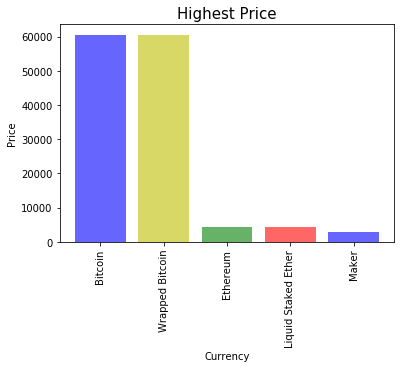

In [77]:
# Set variables to be charted
x_axis = top_price.index.values
y_axis = top_price.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.6, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Highest Price", fontsize=15)
plt.ylabel("Price")
plt.xlabel("Currency")

Text(0.5, 0, 'Currency')

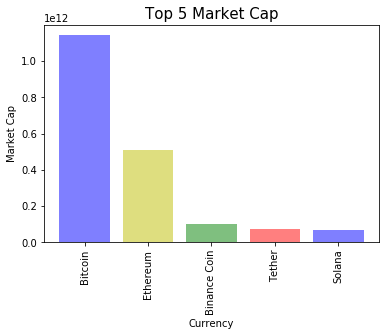

In [73]:
x = top_mCap
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Top 5 Market Cap", fontsize=15)
plt.ylabel("Market Cap")
plt.xlabel("Currency")

Text(0.5, 0, 'Currency')

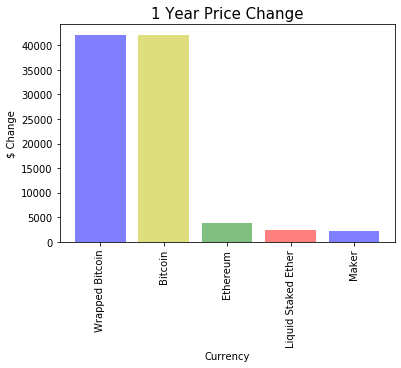

In [72]:
x = top_p_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("1 Year Price Change", fontsize=15)
plt.ylabel("$ Change")
plt.xlabel("Currency")

AttributeError: module 'matplotlib.pyplot' has no attribute 'show_grid'

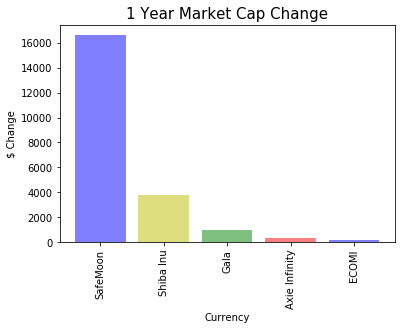

In [70]:
x = top_pp_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("1 Year Market Cap Change", fontsize=15)
plt.ylabel("Market Cap Change")
plt.xlabel("Currency")

Text(0.5, 0, 'Currencies')

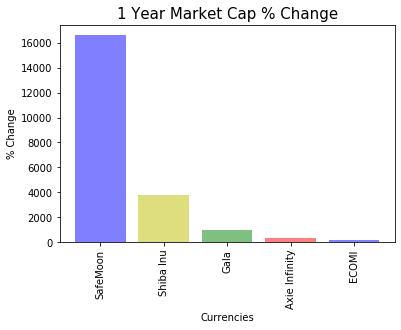

In [71]:
x = top_mcp_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("1 Year Market Cap % Change", fontsize=15)
plt.ylabel("% Change")
plt.xlabel("Currencies")

Text(0.5, 0, 'Price')

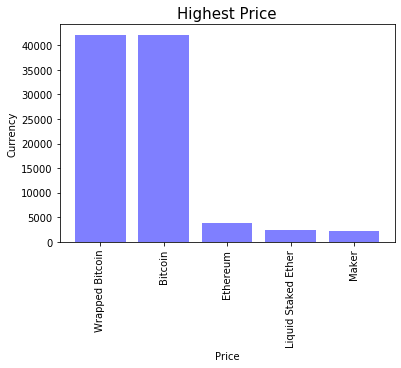

In [78]:
x = top_mc_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Highest Price", fontsize=15)
plt.ylabel("Currency")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

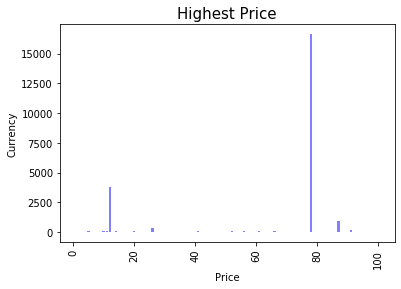

In [82]:
# Set variables to be charted
x_axis = currency_df['Rank'].values
y_axis = currency_df['Year % Price Change'].values
# Create bar chart
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Highest Price", fontsize=15)
plt.ylabel("Currency")
plt.xlabel("Price")

# Set variables
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max temp"]
plt.scatter(y_axis, x_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.30)

plt.title("Latitude Vs Temperature",fontsize =15)
plt.xlabel("Latitude")
plt.ylabel("Temperature in C")
plt.grid()

In [59]:
currency_list = []
answer = "yes"
while answer == "yes":
    q_divider = input("Do you have a particular currency you are interested in? (yes/no)")
    if q_divider == "yes":
        more = "yes"
        while more == "yes":
            currency = input("please insert the name of a currency your are interested in: ")
            currency_list.append(currency)
            more = input("Are you interested in any other currency? ")
        answer = "no"
        
# Find a way to reformat currency_list to be used with the url
    elif q_divider == "no":
        print("This are the all the possibilities: ")
        index = 0
        for x in response:
            print(response[index]['name'])
            index += 1
        answer = input("Are you interested in any of this (yes/no)")
        more = "yes"
        while more == "yes":
            currency = input("please insert the name of a currency your are interested in: ")
            currency_list.append(currency)
            more = input("Are you interested in any other currency? ")
        answer = "no"
    else:
        print("I'm sorry, that is not a valid answer ... ")
        print("Ok, let's start again")
print(f"Ok, the currencies you are interested in are {currency_list}")

Do you have a particular currency you are interested in? (yes/no)no
This are the all the possibilities: 
Bitcoin
Ethereum
Binance Coin
Tether
Solana
Cardano
XRP
Polkadot
USD Coin
Dogecoin
HEX
Shiba Inu
Avalanche
Luna
Litecoin
Wrapped Bitcoin
ChainLink
Binance USD
Algorand
Bitcoin Cash
FTX Token
Polygon
Uniswap Protocol Token
Crypto.com Chain
VeChain Thor
Axie Infinity
Dai
Stellar
TRON
Cosmos
Dfinity
Filecoin
Compound Ether
Ethereum Classic
OKEx Utility Token
Theta Token
Liquid Staked Ether
Hedera Hashgraph
TerraUSD
Elrond
Fantom
1inch
Near Protocol
Helium
Compound Dai
The Graph
Tezos
Decentraland
Monero
EOS
PancakeSwap
Flow
Klaytn
IOTA (MIOTA)
Aave
Compound USD Coin
Loopring
Quant
Kusama
Thorchain
Bitcoin SV
Arweave
NEO
UNUS SED LEO
The Sandbox
Kadena
Enjin Coin
Harmony
Stacks
Bitcoin Cash ABC
Chiliz
AMP Token
Maker
BitTorrent
Sushi
Holo
IoTeX Network
Waves
SafeMoon
Dash
Compound
Zcash
Nexo
Celsius
NEM
KuCoin Token
Huobi Token
Celo
Synthetix Network Token
Basic Attention Token
Curve DA

In [60]:
choice_df = pd.DataFrame({})

In [61]:
currency_list

['Bitcoin', 'Ethereum', 'Tether', 'Solana']

In [62]:
for currency in currency_list:
    actual = currency_df.loc[currency_df["Name"] == currency, :]
    choice_df = choice_df.append(actual)

In [63]:
choice_df

,Name,Ticker,Rank,Price,Market Cap,High,Year Price Change,Year % Price Change
0,Bitcoin,BTC,1,59451.69786285,1122175647971,67602.40268387,41035.79511767,2.2283
1,Ethereum,ETH,2,4163.46517827,492841404781,4811.20040959,3603.72417005,6.4382
3,Tether,USDT,4,1.00254083,74843126300,1.09097429,0.00084027137,0.0008
4,Solana,SOL,5,215.23033260,65316036644,259.03786477,213.07655995,98.9318


Text(0.5, 0, 'Drug Regimen')

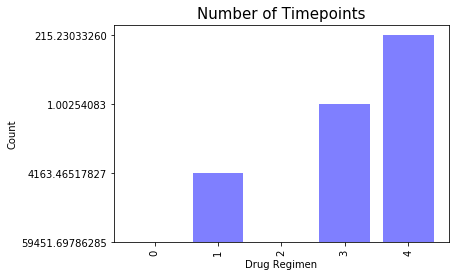

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set variables to be charted
panda_bars = choice_df["Price"]
x_axis = panda_bars.index.values
y_axis = panda_bars.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Number of Timepoints", fontsize=15)
plt.ylabel("Count")
plt.xlabel("Drug Regimen")